# **Pima Indians Diabetes Database Descriptive Statistics Project**

Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.




### **Columns of the dataset**

- **Pregnancies:** Number of times pregnant

- **Glucose:** Plasma glucose concentration 2 hours in an oral glucose tolerance test

- **Blood Pressure:** Diastolic blood pressure (mm Hg)

- **Skin Thickness:** Triceps skin fold thickness (mm

- **Insulin:** 2-Hour serum insulin (mu U/ml)

- **BMI:** Body mass index (weight in kg/(height in m)^2) 

- **Diabetes Pedigree Function:** Diabetes pedigree function

- **Age:** Age (years)

- **Outcome:** Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dia = pd.read_csv("diabetes.csv")

In [4]:

dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 1.    Please do the basic exploration of data and explain missing values, number of rows and columns and data types in statistical term.

- Minimum values for many variables are 0.
- As biological parameters like Glucose, BloodPreasure, Skin thickness,Insulin & BMI cannot have zero values, looks like null values have     been coded as zeros

In [5]:
#dropping null values

drop_Glu=dia.index[dia.Glucose == 0].tolist()
drop_BP=dia.index[dia.BloodPressure == 0].tolist()
drop_Skin = dia.index[dia.SkinThickness==0].tolist()
drop_Ins = dia.index[dia.Insulin==0].tolist()
drop_BMI = dia.index[dia.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
dbt=dia.drop(dia.index[c])

In [6]:
dbt

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


In [7]:
dbt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


  - Total number **Rows** are 392
  - Total number of **columns** are 9
  
  
  **Datatypes in statisical terms**

  - ***Pregnencies :-*** Discrete data
  - ***Glucose :-*** Discrete data
  - ***BloodPressure :-*** Discrete data
  - ***SkinThickness :-*** Discrete data
  - ***Insulin :-*** Discrete data
  - ***BMI :-*** Continuous data
  - ***DiabetesPedigreeFunction :-*** Continuous data
  - ***Age :-*** Continuous data
  - ***Outcome :-*** Catagorical data

## 2.  Calculate appropriate measures of central tendency for Glucose and outcome column only?

The central tendency can be measure by the,
   - **mean**
   - **median**
   - **mode**

In [8]:
#Filtering Glucose and Outcome column from the dataframe

gno = dbt.filter(items=['Glucose', 'Outcome'])
gno

,Glucose,Outcome
3,89,0
4,137,1
6,78,1
8,197,1
13,189,1
...,...,...
753,181,1
755,128,1
760,88,0
763,101,0


In [9]:
#Mean of Glucose and outcome

gno.mean()

Glucose    122.627551
Outcome      0.331633
dtype: float64

In [10]:
#Median of Glucose and outcome

gno.median()

Glucose    119.0
Outcome      0.0
dtype: float64

In [11]:
#Mode of Glucose and outcome

gno.mode()

,Glucose,Outcome
0,100,0


## 3. Please provide 5 points data summaries for required columns?

The five-number summary involves the calculation of 5 summary statistical quantities:

  - **min quantile**: The minimum value

  - **1st quantile**: The 25th percentile. 

  - **2nd quantile**: The 50th percentile

  - **3rd quantile**: The 75th percentile

  - **max quantile**: The maximum value

In [12]:
#Finding quantile values

dbt.quantile([0,0.25,0.5,0.75, 1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.00,0.0,56.0,24.0,7.0,14.00,18.2,0.08500,21.0,0.0
0.25,1.0,99.0,62.0,21.0,76.75,28.4,0.26975,23.0,0.0
0.50,2.0,119.0,70.0,29.0,125.50,33.2,0.44950,27.0,0.0
0.75,5.0,143.0,78.0,37.0,190.00,37.1,0.68700,36.0,1.0
1.00,17.0,198.0,110.0,63.0,846.00,67.1,2.42000,81.0,1.0


In [13]:
# 0.0 is the min quantile
# 0.25 is the 25% which is 1st quantile
# 0.50 is the 50% which is 2nd quantile
# 0.75 is the 75% which is 3rd quantile
# 1.0 is the max quantile

## 4. Please create an appropriate plot to examine the relationship between Age and Glucose.

Text(0, 0.5, 'Age')

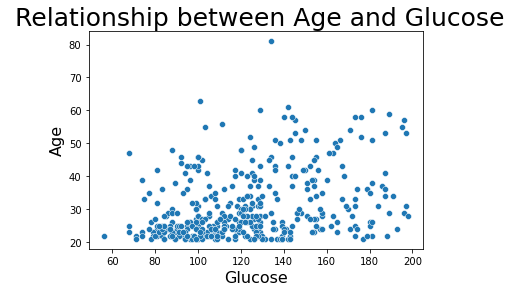

In [14]:
#Plotting Sactetr plot 

sns.scatterplot(x='Glucose', y='Age', data=dbt)
plt.title(' Relationship between Age and Glucose', fontsize=25)
plt.xlabel('Glucose', fontsize=16)
plt.ylabel('Age', fontsize=16)

**The above given graph describes the relation between Age and Glucose**

<AxesSubplot:xlabel='Glucose', ylabel='Age'>

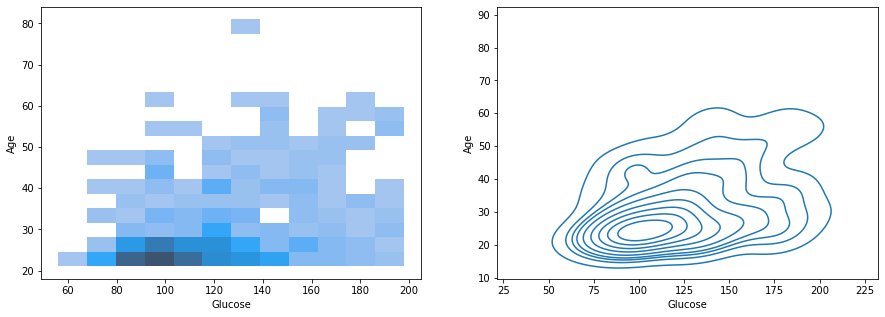

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(x='Glucose', y='Age', data=dbt,  ax=axes[0])
sns.kdeplot(x='Glucose', y='Age', data=dbt, ax=axes[1])

## 5. Please create an appropriate plot to see the distribution of Outcome variable?


Text(0, 0.5, 'Frequency')

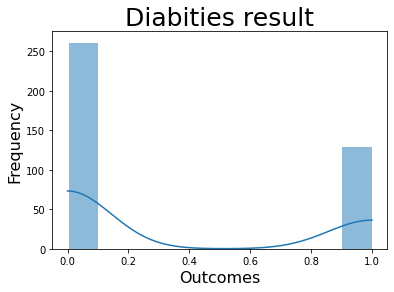

In [16]:
#Plotting histogram plot for distributing outcomes

sns.histplot(dbt['Outcome'], kde=True,edgecolor = 'white')
plt.title('Diabities result', fontsize=25)
plt.xlabel('Outcomes', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

**The above given graph describes the distribution of Outcome variable**

## 6. Please examine the distribution of numerical data and explain which variable normally distributed and which variable is seems to be skewed. Please also tell the direction of skewness.

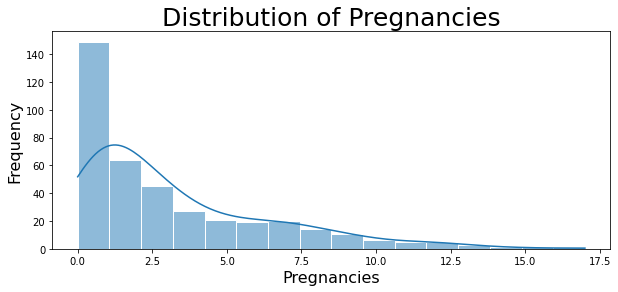

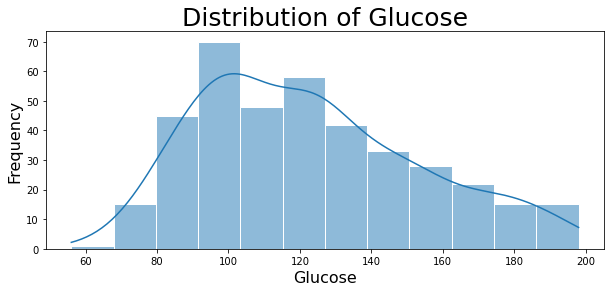

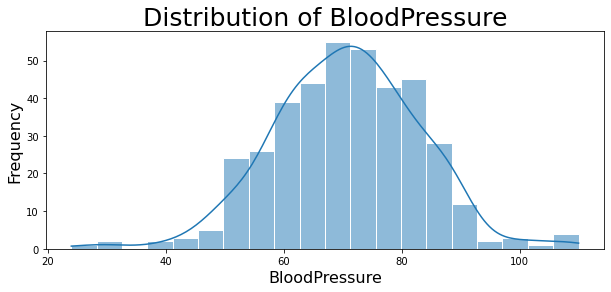

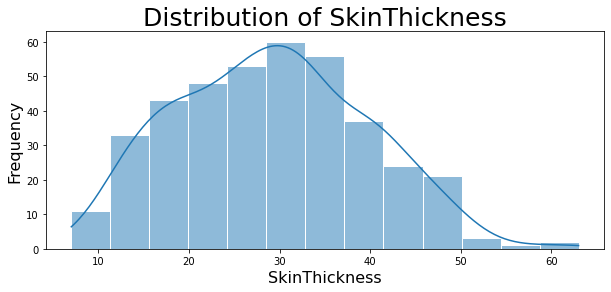

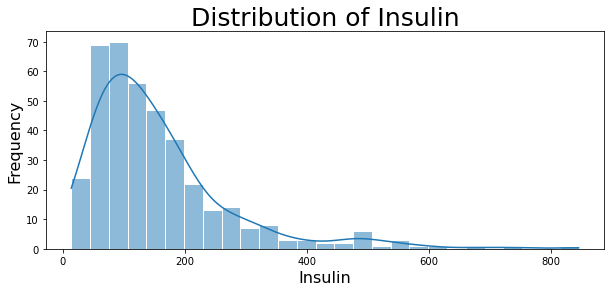

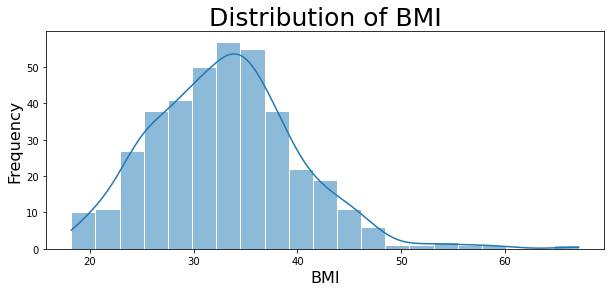

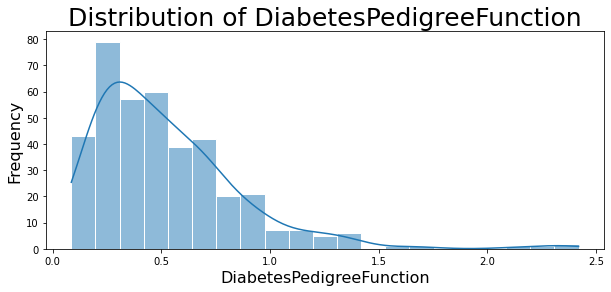

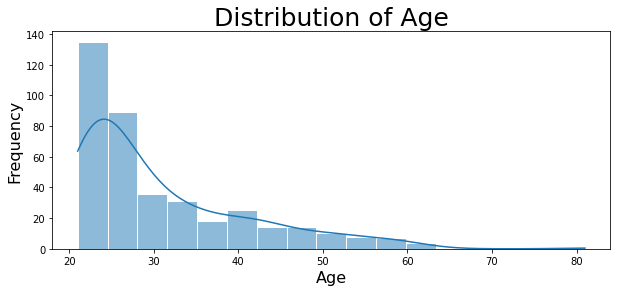

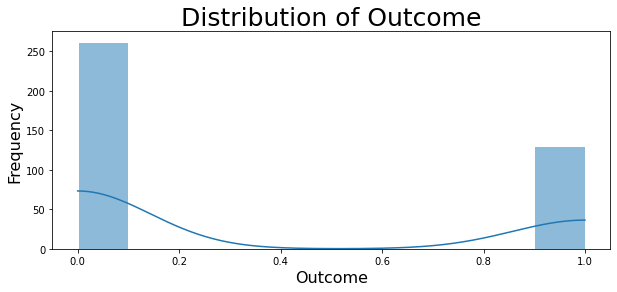

In [17]:
#Plotting multiple graphs using for loops

column = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for i in column:
    fig, ax = plt.subplots(1,1, figsize=(10, 4))
    sns.histplot(dbt[i],kde=True,edgecolor = 'white')
    plt.title('Distribution of %s'%(i), fontsize=25)
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

**Bloodpreasure** and **SkinThickness** are **normally distributed**

**Outcome** variable is also **normally distributed** because there is only 2 data in which 0 mean non-diabetic and 1 means diabetic.


And **Pregnencies, Glucose, Insulin, BMI and DiabetesPedigreeFunction** variables is seems to be **skewed**.

  **Direction of skewness.**

  - ***Pregnencies :-*** Right tailed skewness
  - ***Glucose :-*** Right tailed skewness
  - ***Insulin :-*** Right tailed skewness
  - ***BMI :-*** Right tailed skewness
  - ***DiabetesPedigreeFunction :-*** Right tailed skewness
  - ***Age :-*** Right tailed skewness
  

## 7. Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed

In [18]:
dbt.skew()

Pregnancies                 1.335596
Glucose                     0.517850
BloodPressure              -0.087516
SkinThickness               0.209311
Insulin                     2.165116
BMI                         0.663485
DiabetesPedigreeFunction    1.959101
Age                         1.403607
Outcome                     0.717990
dtype: float64

  **The skewness value of the variables are gven above**

  - ***Pregnencies :-*** highly skewed
  - ***Glucose :-*** moderately skewed
  - ***BloodPressure :-*** symmetrical
  - ***SkinThickness :-*** symmetrical
  - ***Insulin :-*** highly skewed
  - ***BMI :-*** moderately skewed
  - ***DiabetesPedigreeFunction :-*** highly skewed
  - ***Age :-*** highly skewed
  - ***Outcome :-*** moderately skewed

## 8. Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.

<AxesSubplot:xlabel='Outcome'>

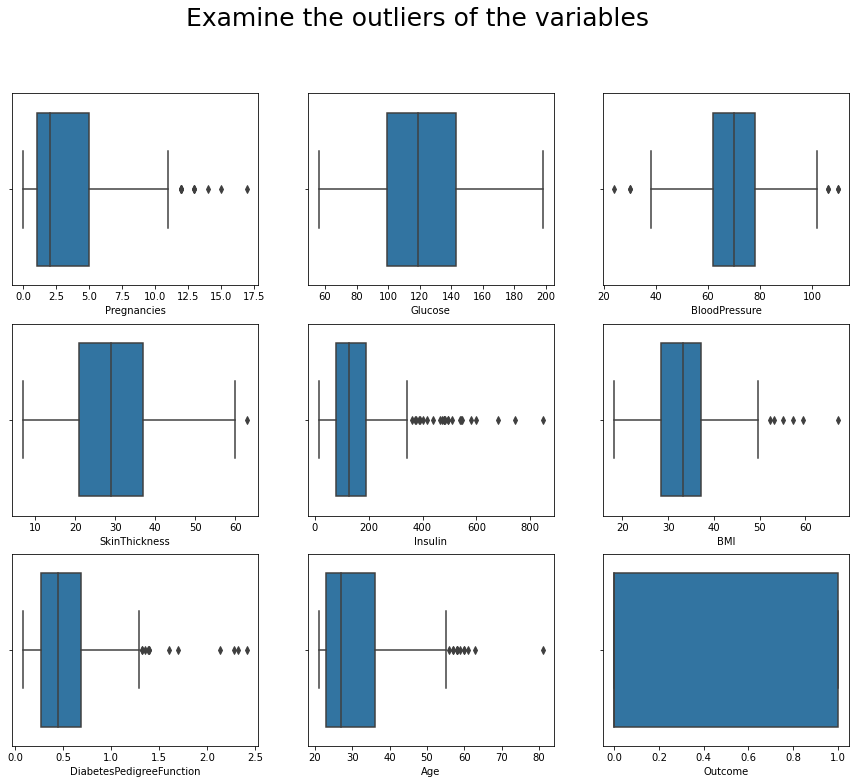

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
 
fig.suptitle('Examine the outliers of the variables', fontsize=25)

sns.boxplot(dbt['Pregnancies'], ax=axes[0, 0])
sns.boxplot(dbt['Glucose'], ax=axes[0, 1])
sns.boxplot(dbt['BloodPressure'], ax=axes[0, 2])
sns.boxplot(dbt['SkinThickness'], ax=axes[1, 0])
sns.boxplot(dbt['Insulin'], ax=axes[1, 1])
sns.boxplot(dbt['BMI'], ax=axes[1, 2])
sns.boxplot(dbt['DiabetesPedigreeFunction'], ax=axes[2, 0])
sns.boxplot(dbt['Age'], ax=axes[2, 1])
sns.boxplot(dbt['Outcome'], ax=axes[2, 2])

  **The varibales containing outliers**

  - Pregnencies
  - BloodPressure 
  - SkinThickness 
  - Insulin 
  - BMI 
  - DiabetesPedigreeFunction 
  - Age 

## 9. What should be the measures of central tendency and dispersion for skewed data?

In [20]:
#Filtering skewed data

skw_data = dbt.filter(items=['Pregnancies','Glucose','Insulin', 'BMI','DiabetesPedigreeFunction','Age'])
skw_data

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
6,3,78,88,31.0,0.248,26
8,2,197,543,30.5,0.158,53
13,1,189,846,30.1,0.398,59
...,...,...,...,...,...,...
753,0,181,510,43.3,0.222,26
755,1,128,110,36.5,1.057,37
760,2,88,16,28.4,0.766,22
763,10,101,180,32.9,0.171,63


The central tendency measure 
   - **mean**
   - **median**
   - **mode**

In [21]:
#mean
skw_data.mean()

Pregnancies                   3.301020
Glucose                     122.627551
Insulin                     156.056122
BMI                          33.086224
DiabetesPedigreeFunction      0.523046
Age                          30.864796
dtype: float64

In [22]:
#median
skw_data.median()

Pregnancies                   2.0000
Glucose                     119.0000
Insulin                     125.5000
BMI                          33.2000
DiabetesPedigreeFunction      0.4495
Age                          27.0000
dtype: float64

In [23]:
#mode
skw_data.mode()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.0,100.0,105.0,32.0,0.692,22.0
1,NaN,NaN,NaN,33.3,NaN,NaN


The dispersion measure 

   - **minimum value**
   - **maximum value**
   - **Range**
   - **variance**
   - **standard deviation**
   - **75th percentile**
   - **50th percentile**
   - **25th percentile**
   - **IQR**

In [24]:
#minimum value
skw_data.min() 

Pregnancies                  0.000
Glucose                     56.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.085
Age                         21.000
dtype: float64

In [25]:
#maximum value
skw_data.max()

Pregnancies                  17.00
Glucose                     198.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
dtype: float64

In [26]:
#Range
skw_data.max()-skw_data.min()

Pregnancies                  17.000
Glucose                     142.000
Insulin                     832.000
BMI                          48.900
DiabetesPedigreeFunction      2.335
Age                          60.000
dtype: float64

In [27]:
#variance
skw_data.var()

Pregnancies                    10.313247
Glucose                       952.387781
Insulin                     14123.347226
BMI                            49.387994
DiabetesPedigreeFunction        0.119362
Age                           104.055842
dtype: float64

In [28]:
#standard deviation
skw_data.std()

Pregnancies                   3.211424
Glucose                      30.860781
Insulin                     118.841690
BMI                           7.027659
DiabetesPedigreeFunction      0.345488
Age                          10.200777
dtype: float64

In [29]:
#50th percentile i.e median(q2)
skw_data.quantile(0.5)

Pregnancies                   2.0000
Glucose                     119.0000
Insulin                     125.5000
BMI                          33.2000
DiabetesPedigreeFunction      0.4495
Age                          27.0000
Name: 0.5, dtype: float64

In [30]:
#75th percentile
q3 = skw_data.quantile(0.75)
q3

Pregnancies                   5.000
Glucose                     143.000
Insulin                     190.000
BMI                          37.100
DiabetesPedigreeFunction      0.687
Age                          36.000
Name: 0.75, dtype: float64

In [31]:
#25th percentile
q1 = skw_data.quantile(0.25)
q1

Pregnancies                  1.00000
Glucose                     99.00000
Insulin                     76.75000
BMI                         28.40000
DiabetesPedigreeFunction     0.26975
Age                         23.00000
Name: 0.25, dtype: float64

In [32]:
#interquartile range
IQR = q3  - q1
IQR

Pregnancies                   4.00000
Glucose                      44.00000
Insulin                     113.25000
BMI                           8.70000
DiabetesPedigreeFunction      0.41725
Age                          13.00000
dtype: float64